Set Up

In [1]:
# Library Set-up

!pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load datasets for 2025

df_sp = pd.read_excel("09 Starting Pitching.xlsx")
df_b = pd.read_excel("09 Batting.xlsx")
df_f = pd.read_excel("09 Fielding.xlsx")
df_r = pd.read_excel("09 Relief.xlsx")
df_w = pd.read_excel("09 Standings.xlsx")

Defaulting to user installation because normal site-packages is not writeable


Data Cleaning / Compiling

In [2]:
#Identify tracking variables
cols_keep_df_sp = ["Tm", "QS%", "GmScA", "IP/GS"]
cols_keep_df_b = ["Tm", "R/G", "SB", "BA", "OBP", "SLG", "HR"]
cols_keep_df_f = ["Tm", "DefEff", "E", "Rdrs"]
cols_keep_df_r = ["Tm", "SV%"]
cols_keep_df_w = ["Tm", "W"]

#Reduce to key variables
df_sp = df_sp[cols_keep_df_sp]
df_b = df_b[cols_keep_df_b]
df_f = df_f[cols_keep_df_f]
df_r = df_r[cols_keep_df_r]
df_w = df_w[cols_keep_df_w]

#Merge
df = (
    df_w
    .merge(df_sp, on="Tm", how="left")
    .merge(df_b,  on="Tm", how="left")
    .merge(df_f,  on="Tm", how="left")
    .merge(df_r,  on="Tm", how="left")
)

print(df.head())

                              Tm    W   QS%  GmScA  IP/GS   R/G     SB     BA  \
0               New York Yankees  103  0.47   50.0    5.8  5.65  111.0  0.283   
1  Los Angeles Angels of Anaheim   97  0.48   49.0    5.9  5.45  148.0  0.285   
2            Los Angeles Dodgers   95  0.51   54.0    5.7  4.81  116.0  0.270   
3                 Boston Red Sox   95  0.51   49.0    5.9  5.38  126.0  0.270   
4          Philadelphia Phillies   93  0.51   51.0    5.9  5.06  119.0  0.258   

     OBP    SLG     HR  DefEff     E  Rdrs   SV%  
0  0.362  0.478  244.0   0.698  86.0  -1.0  0.76  
1  0.350  0.441  173.0   0.687  85.0  -1.0  0.73  
2  0.346  0.412  145.0   0.713  83.0   9.0  0.63  
3  0.352  0.454  212.0   0.678  82.0  11.0  0.69  
4  0.334  0.447  224.0   0.693  76.0   9.0  0.67  


Batting and Base Running

Runs per Game vs Wins

In [3]:
# Determine correlation matrix

cm_RPG = df[["W", "R/G"]].corr()
cv_RPG = cm_RPG.iloc[0, 1]
cm_RPG

,W,R/G
W,1.000000,0.611184
R/G,0.611184,1.000000


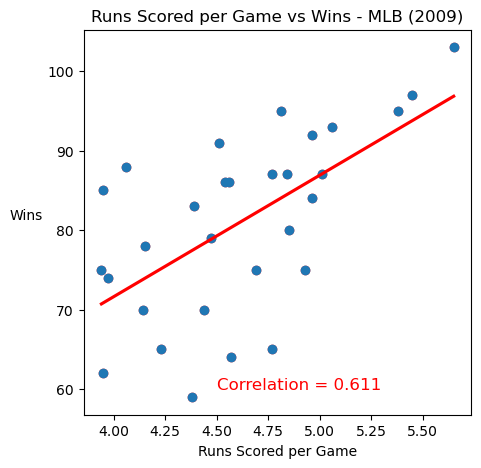

In [5]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["R/G"], df["W"], "o",)
sns.regplot(x = "R/G", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Runs Scored per Game")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Runs Scored per Game vs Wins - MLB (2009)")
plt.text(4.5, 60, f"Correlation = {cv_RPG:.3f}", color = "red", size = 12)
plt.show()

Stolen Bases vs Wins

In [6]:
# Determine correlation matrix

cm_SB = df[["W", "SB"]].corr()
cv_SB = cm_SB.iloc[0, 1]
cm_SB

,W,SB
W,1.000000,0.266853
SB,0.266853,1.000000


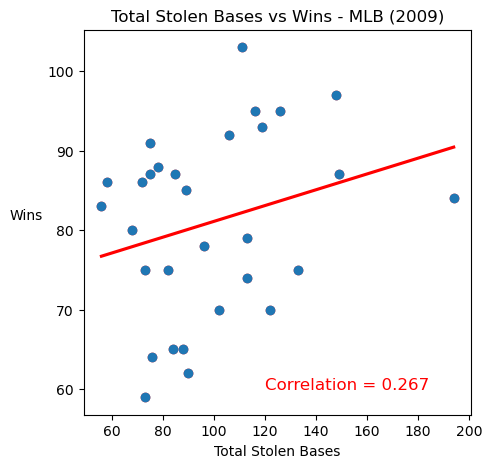

In [7]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SB"], df["W"], "o",)
sns.regplot(x = "SB", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Total Stolen Bases")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Total Stolen Bases vs Wins - MLB (2009)")
plt.text(120, 60, f"Correlation = {cv_SB:.3f}", color = "red", size = 12)
plt.show()

Batting Average vs Wins

In [8]:
# Determine correlation matrix

cm_BA = df[["W", "BA"]].corr()
cv_BA = cm_BA.iloc[0, 1]
cm_BA

,W,BA
W,1.000000,0.467195
BA,0.467195,1.000000


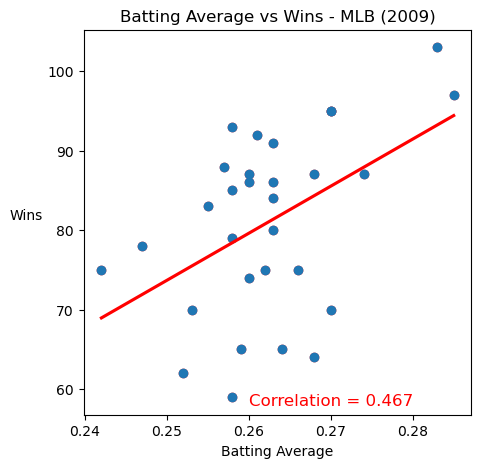

In [10]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["BA"], df["W"], "o",)
sns.regplot(x = "BA", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Batting Average")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Batting Average vs Wins - MLB (2009)")
plt.text(0.26, 58, f"Correlation = {cv_BA:.3f}", color = "red", size = 12)
plt.show()

On Base Percentage vs Wins

In [11]:
# Determine correlation matrix

cm_OB = df[["W", "OBP"]].corr()
cv_OB = cm_OB.iloc[0, 1]
cm_OB

,W,OBP
W,1.00000,0.48396
OBP,0.48396,1.00000


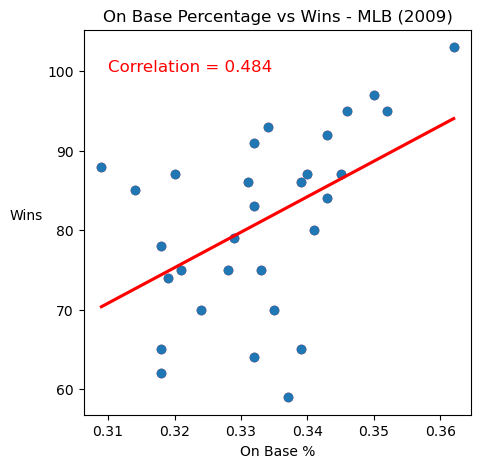

In [12]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["OBP"], df["W"], "o",)
sns.regplot(x = "OBP", y = "W", data = df, ci = None, color = "red")
plt.xlabel("On Base %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("On Base Percentage vs Wins - MLB (2009)")
plt.text(0.31, 100, f"Correlation = {cv_OB:.3f}", color = "red", size = 12)
plt.show()

Slugging Percentage vs Wins

In [13]:
# Determine correlation matrix

cm_SL = df[["W", "SLG"]].corr()
cv_SL = cm_SL.iloc[0, 1]
cm_SL

,W,SLG
W,1.000000,0.590389
SLG,0.590389,1.000000


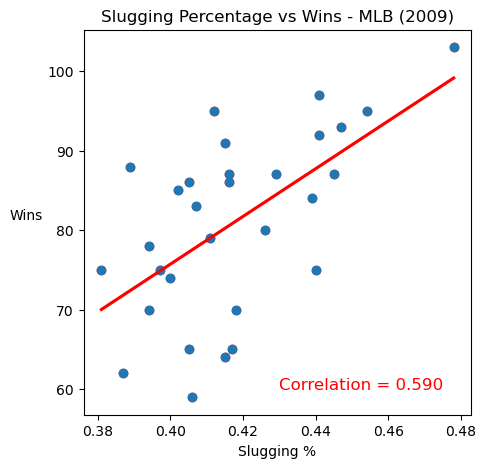

In [14]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SLG"], df["W"], "o",)
sns.regplot(x = "SLG", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Slugging %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Slugging Percentage vs Wins - MLB (2009)")
plt.text(0.43, 60, f"Correlation = {cv_SL:.3f}", color = "red", size = 12)
plt.show()

Home Runs vs Wins

In [15]:
# Determine correlation matrix

cm_HR = df[["W", "HR"]].corr()
cv_HR = cm_HR.iloc[0, 1]
cm_HR

,W,HR
W,1.00000,0.51351
HR,0.51351,1.00000


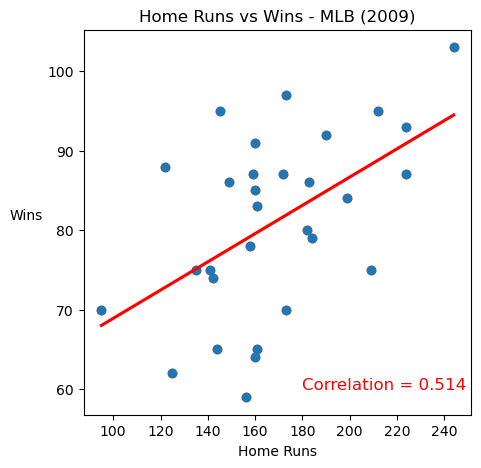

In [16]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["HR"], df["W"], "o",)
sns.regplot(x = "HR", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Home Runs")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Home Runs vs Wins - MLB (2009)")
plt.text(180, 60, f"Correlation = {cv_HR:.3f}", color = "red", size = 12)
plt.show()

Fielding

Defensive Efficiency vs Wins

In [18]:
# Determine correlation matrix

cm_DE = df[["W", "DefEff"]].corr()
cv_DE = cm_DE.iloc[0, 1]
cm_DE

,W,DefEff
W,1.000000,0.458201
DefEff,0.458201,1.000000


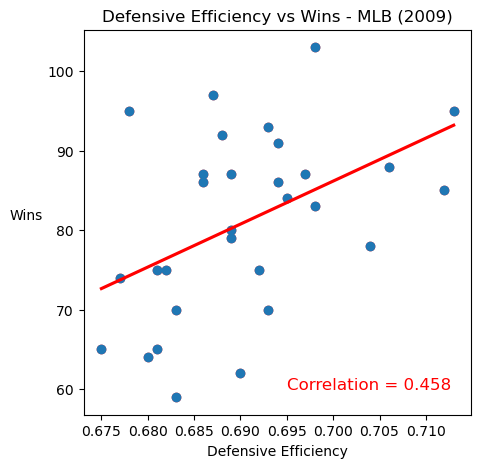

In [19]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["DefEff"], df["W"], "o",)
sns.regplot(x = "DefEff", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Defensive Efficiency")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Defensive Efficiency vs Wins - MLB (2009)")
plt.text(0.695, 60, f"Correlation = {cv_DE:.3f}", color = "red", size = 12)
plt.show()

Errors vs Wins

In [20]:
# Determine Correlation Matrix

cm_E = df[["W", "E"]].corr()
cv_E = cm_E.iloc[0, 1]
cm_E

,W,E
W,1.000000,-0.409866
E,-0.409866,1.000000


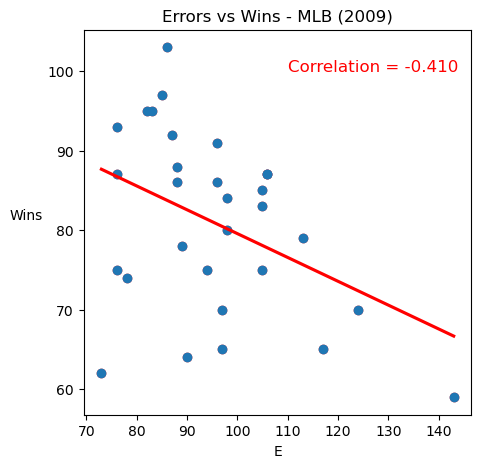

In [21]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["E"], df["W"], "o",)
sns.regplot(x = "E", y = "W", data = df, ci = None, color = "red")
plt.xlabel("E")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Errors vs Wins - MLB (2009)")
plt.text(110, 100, f"Correlation = {cv_E:.3f}", color = "red", size = 12)
plt.show()

Defensive Runs Saved vs Wins

In [23]:
# Determine Correlation Matrix

cm_DR = df[["W", "Rdrs"]].corr()
cv_DR = cm_DR.iloc[0, 1]
cm_DR

,W,Rdrs
W,1.00000,0.18178
Rdrs,0.18178,1.00000


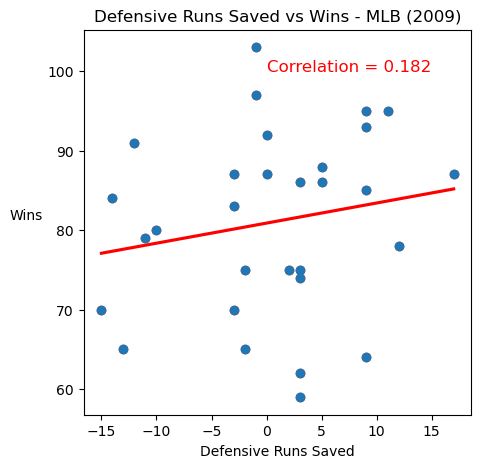

In [24]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["Rdrs"], df["W"], "o",)
sns.regplot(x = "Rdrs", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Defensive Runs Saved")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Defensive Runs Saved vs Wins - MLB (2009)")
plt.text(0, 100, f"Correlation = {cv_DR:.3f}", color = "red", size = 12)
plt.show()

Pitching

Quality Start Percentage vs Wins

In [25]:
# Determine Correlation Matrix

cm_QS = df[["W", "QS%"]].corr()
cv_QS = cm_QS.iloc[0, 1]
cm_QS

,W,QS%
W,1.000000,0.384799
QS%,0.384799,1.000000


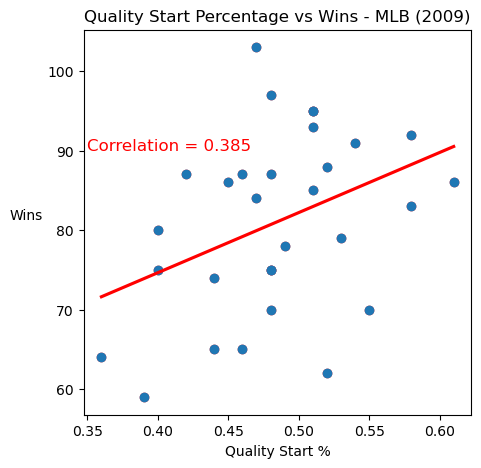

In [26]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["QS%"], df["W"], "o",)
sns.regplot(x = "QS%", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Quality Start %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Quality Start Percentage vs Wins - MLB (2009)")
plt.text(0.35, 90, f"Correlation = {cv_QS:.3f}", color = "red", size = 12)
plt.show()

Average Game Score vs Wins

In [27]:
# Determine Correlation Matrix

cm_GMS = df[["W", "GmScA"]].corr()
cv_GMS = cm_GMS.iloc[0, 1]
cm_GMS

,W,GmScA
W,1.000000,0.588123
GmScA,0.588123,1.000000


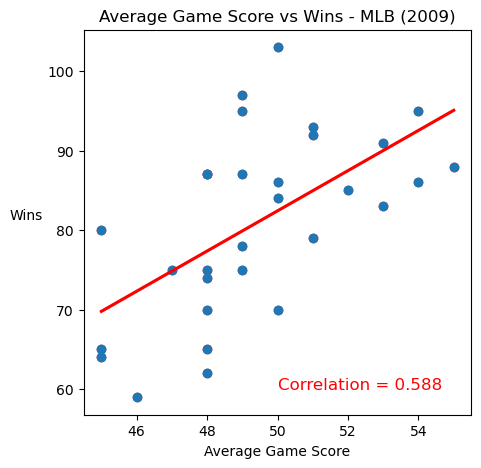

In [28]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["GmScA"], df["W"], "o",)
sns.regplot(x = "GmScA", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Average Game Score")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Average Game Score vs Wins - MLB (2009)")
plt.text(50, 60, f"Correlation = {cv_GMS:.3f}", color = "red", size = 12)
plt.show()

Innings Pitched per Game Started vs Wins

In [29]:
# Determine Correlation Matrix

cm_IP = df[["W", "IP/GS"]].corr()
cv_IP = cm_IP.iloc[0, 1]
cm_IP

,W,IP/GS
W,1.000000,0.381319
IP/GS,0.381319,1.000000


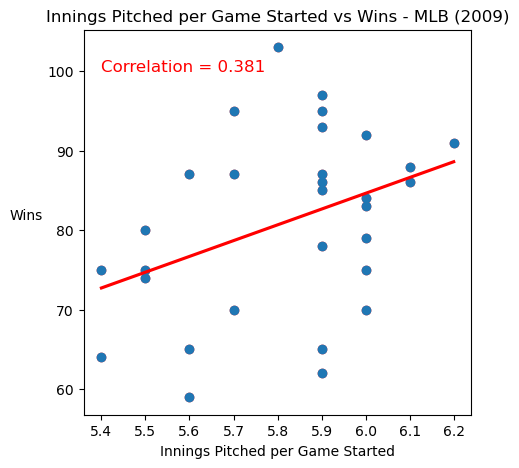

In [30]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["IP/GS"], df["W"], "o",)
sns.regplot(x = "IP/GS", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Innings Pitched per Game Started")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Innings Pitched per Game Started vs Wins - MLB (2009)")
plt.text(5.4, 100, f"Correlation = {cv_IP:.3f}", color = "red", size = 12)
plt.show()

Save Percentage vs Wins

In [32]:
# Determine Correlation Matrix

cm_S = df[["W", "SV%"]].corr()
cv_S = cm_S.iloc[0, 1]
cm_S

,W,SV%
W,1.00000,0.62701
SV%,0.62701,1.00000


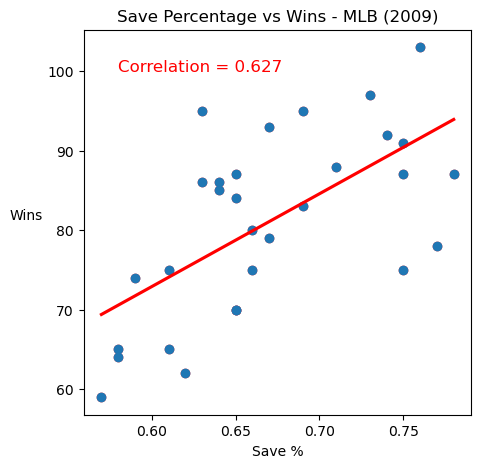

In [34]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SV%"], df["W"], "o",)
sns.regplot(x = "SV%", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Save %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Save Percentage vs Wins - MLB (2009)")
plt.text(0.58, 100, f"Correlation = {cv_S:.3f}", color = "red", size = 12)
plt.show()

Compute mean coefficients for batting, fielding, pitching

In [29]:
#Put coefs into lists
batting_corrs = [cv_SB, cv_BA, cv_OB, cv_SL, cv_HR]
fielding_corrs = [cv_DE, cv_E, cv_DR]
pitching_corrs = [cv_QS, cv_GMS, cv_IP, cv_S]

In [30]:
#Compute means
batting_mean  = np.mean(batting_corrs)
print(batting_mean)
fielding_mean = np.mean(np.abs(fielding_corrs))
print(fielding_mean)
pitching_mean = np.mean(pitching_corrs)
print(pitching_mean)

0.46438166482060667
0.3499490576934723
0.49531270385915677
